Experiment 1 adapted from github of @ritvikmath

# experiment 1

In [21]:
# Assumption for this test is ts is stationary

The Null hypothesis for grangercausalitytests is that the time series in the second column, t2, does NOT Granger cause the time series in the first column, t1. 
Grange causality means that past values of t2 have a statistically significant effect on the current value of t1, taking past values of t1 into account as regressors. 

We reject the null hypothesis that t2 does not Granger cause t1 if the pvalues are below a desired size of the test.

The null hypothesis for all four test is that the coefficients corresponding to past values of the second time series are zero.

==> params_ftest, ssr_ftest are based on F distribution

In [1]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
np.random.seed(25)
#build the time series, just a simple AR(1)
t1 = [0.1*np.random.normal()]
t1

[0.022827308966608444]

In [27]:
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())

([<matplotlib.lines.Line2D at 0x16dc0127eb0>], 101)

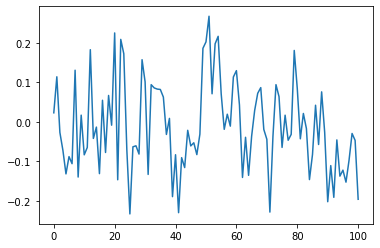

In [28]:
plt.plot(t1), len(t1)

In [29]:
#build the time series that is granger caused by t1
t2 = [item + 0.1*np.random.normal() for item in t1]

([<matplotlib.lines.Line2D at 0x16dc01861c0>], 101)

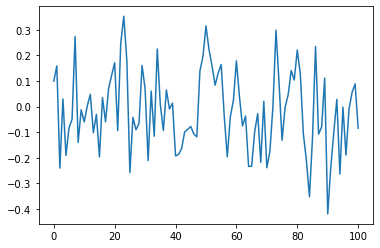

In [30]:
plt.plot(t2), len(t2)

In [31]:
#adjust t1 and t2
t1 = t1[3:]
t2 = t2[:-3]

In [32]:
len(t1), len(t2)

(98, 98)

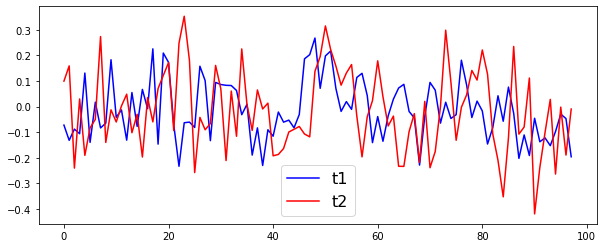

In [33]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16);

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
root i.e. not stationary, with the alternative that there is no unit root i.e. stationary. 

If the pvalue is above a critical size, then we cannot reject that there is a unit root.

In [34]:
# Ho: there is a unit root i.e. Yt = c + 1*Yt-1
# Ha: there is not unit root
# check for stationarity - Augmented Dickey Fuller test
def check_stationarity(y):    
    result = adfuller(y)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [35]:
check_stationarity(t1) # series is stationary

ADF Statistic: -3.080064
p-value: 0.028064
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


In [36]:
check_stationarity(t2)  # series is stationary

ADF Statistic: -7.356598
p-value: 0.000000
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583


In [37]:
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))

In [38]:
ts_df

,t2,t1
0,0.099234,-0.072572
1,0.158634,-0.131975
2,-0.240465,-0.088220
3,0.029465,-0.106101
4,-0.190714,0.130740
...,...,...
93,0.027861,-0.152890
94,-0.263696,-0.097660
95,-0.002328,-0.029545
96,-0.189635,-0.047041


t1(t) = c + alpha1*t1(t-1) + beta1 * t2(t-1) + alpha2*t1(t-2) + beta2 * t2(t-2) + ...

Ho: t2 does not Granger cause t1, the betas associated with t2 are all zero

Ha: t2 Granger causes t1, , not all the betas associated with t2 are zero

Reject Ho if the pvalues are below a desired size of the test

The null hypothesis for all four test is that the coefficients corresponding to past values of the second time series are zero.

In [39]:
gc_res = grangercausalitytests(ts_df, maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1634  , p=0.1447  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=2.2325  , p=0.1351  , df=1
likelihood ratio test: chi2=2.2072  , p=0.1374  , df=1
parameter F test:         F=2.1634  , p=0.1447  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2291  , p=0.0175  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=8.9228  , p=0.0115  , df=2
likelihood ratio test: chi2=8.5322  , p=0.0140  , df=2
parameter F test:         F=4.2291  , p=0.0175  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=25.6760 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=83.1554 , p=0.0000  , df=3
likelihood ratio test: chi2=59.7340 , p=0.0000  , df=3
parameter F test:         F=25.6760 , p=0.0000  , df_denom=88, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=19.4763 , p=0.0000  , df_d

# experiment 2 with series that are not related

In [15]:
nt1 = np.random.normal(size=100)
nt2 = np.random.normal(size=100)

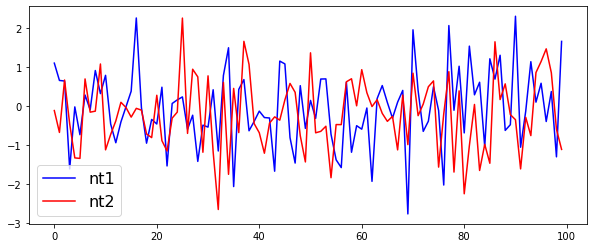

In [16]:
plt.figure(figsize=(10,4))
plt.plot(nt1, color='b')
plt.plot(nt2, color='r')

plt.legend(['nt1', 'nt2'], fontsize=16);

In [17]:
check_stationarity(nt1)

ADF Statistic: -12.125049
p-value: 0.000000
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In [18]:
check_stationarity(nt2)

ADF Statistic: -6.046570
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583


In [19]:
nts_df = pd.DataFrame(columns=['nt2', 'nt1'], data=zip(nt2,nt1))

In [37]:
gc_res = grangercausalitytests(nts_df, maxlag=5)
# observe p-values in ssr based F test, this is partial F test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4836  , p=0.4885  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.4987  , p=0.4801  , df=1
likelihood ratio test: chi2=0.4974  , p=0.4806  , df=1
parameter F test:         F=0.4836  , p=0.4885  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1828  , p=0.8332  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=0.3853  , p=0.8248  , df=2
likelihood ratio test: chi2=0.3846  , p=0.8251  , df=2
parameter F test:         F=0.1828  , p=0.8332  , df_denom=93, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8083  , p=0.4925  , df_denom=90, df_num=3
ssr based chi2 test:   chi2=2.6136  , p=0.4551  , df=3
likelihood ratio test: chi2=2.5790  , p=0.4612  , df=3
parameter F test:         F=0.8083  , p=0.4925  , df_denom=90, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1081  , p=0.3579  , df_d

shows that there is no causality